# MNIST Analysis
The MNIST data files can be downloaded from [this website](http://yann.lecun.com/exdb/mnist/). One little detail: the data files are in the `.idx` format. Fortunately, there is a Python utility we can use to convert the data to `numpy` arrays: the `idx2numpy` library.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import idx2numpy

In [14]:
train_images = idx2numpy.convert_from_file('./data/train-images-idx3-ubyte/train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('./data/train-labels-idx1-ubyte/train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('./data/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('./data/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

In [124]:
norm_train_images = train_images/255

In [98]:
# Turning the labels into NN outputs
train_labels_vec = np.zeros((len(train_labels), 10))
for i, label in enumerate(train_labels):
    train_labels_vec[i, label-1] = 1

In [86]:
# Structuring train data
train_data = {}
for i, (train_image, train_label) in enumerate(zip(train_images, train_labels)):
    vec_label = np.zeros((10))
    vec_label[train_label-1] = 1
    train_data[i] = {'img': train_image, 'label': train_label, 'out': vec_label}

In [85]:
# Structuring test data
test_data = {}
for i, (test_image, test_label) in enumerate(zip(test_images, test_labels)):
    vec_label = np.zeros((10))
    vec_label[test_label-1] = 1
    test_data[i] = {'img': test_image, 'label': test_label, 'out': vec_label}

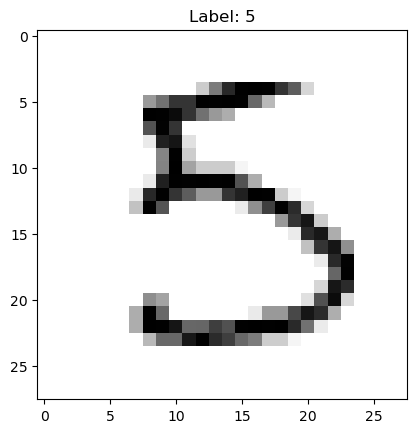

In [88]:
# I want to be able to visualize the images
i = 15
plt.imshow(test_data[i]['img'], cmap='gray_r')
plt.title(f"Label: {test_data[i]['label']}")
plt.show()

Now, we can start defining a model. In the MNIST website, there is a table with different models and scores. Let's use one of them: the 2-layer NN, 300 hidden units, mean square error, which obtains a test error rate of 4.9%.

In [127]:
input_layer = keras.Input(shape=(28,28), name='Input')
flatten_layer = keras.layers.Flatten(name='Flatten')
hidden_layer = keras.layers.Dense(300, activation='relu', name='hidden')
out_layer = keras.layers.Dense(10, name='out')
model = keras.Sequential([input_layer, flatten_layer, hidden_layer, out_layer], name='MNIST_classifier')
model.summary()
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3)
)

Model: "MNIST_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 300)               235500    
                                                                 
 out (Dense)                 (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


We can now train the model on the training data:

In [129]:
model.fit(
    x=norm_train_images,
    y=train_labels_vec,
    batch_size=30,
    epochs=10,
)

Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0047
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0042
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 9/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0037
Epoch 10/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0036


In [121]:
model(np.array([test_images[2]])).numpy()

array([[0.11116392, 0.08867612, 0.11549872, 0.11999615, 0.09101544,
        0.08919667, 0.09439687, 0.10780614, 0.09329119, 0.08731483]],
      dtype=float32)

In [130]:
def model_prediction(model, image):
    model_raw_output = model(np.array([image])).numpy()
    predicted_value = np.argmax(model_raw_output) + 1
    return predicted_value


In [135]:
count = 0
for test_image, test_label in zip(test_images, test_labels):
    if model_prediction(model, test_image) == test_label:
        count += 1

acc = count/len(test_labels)
print(f'Test accuracy: {acc:.2f}')

Test accuracy: 0.88
